### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import os

### Read the Microsoft stock file

In [2]:
df= pd.read_excel('Microsoft_20years_Stock.xlsx') #XGBRegressor

### Visulaization for the data

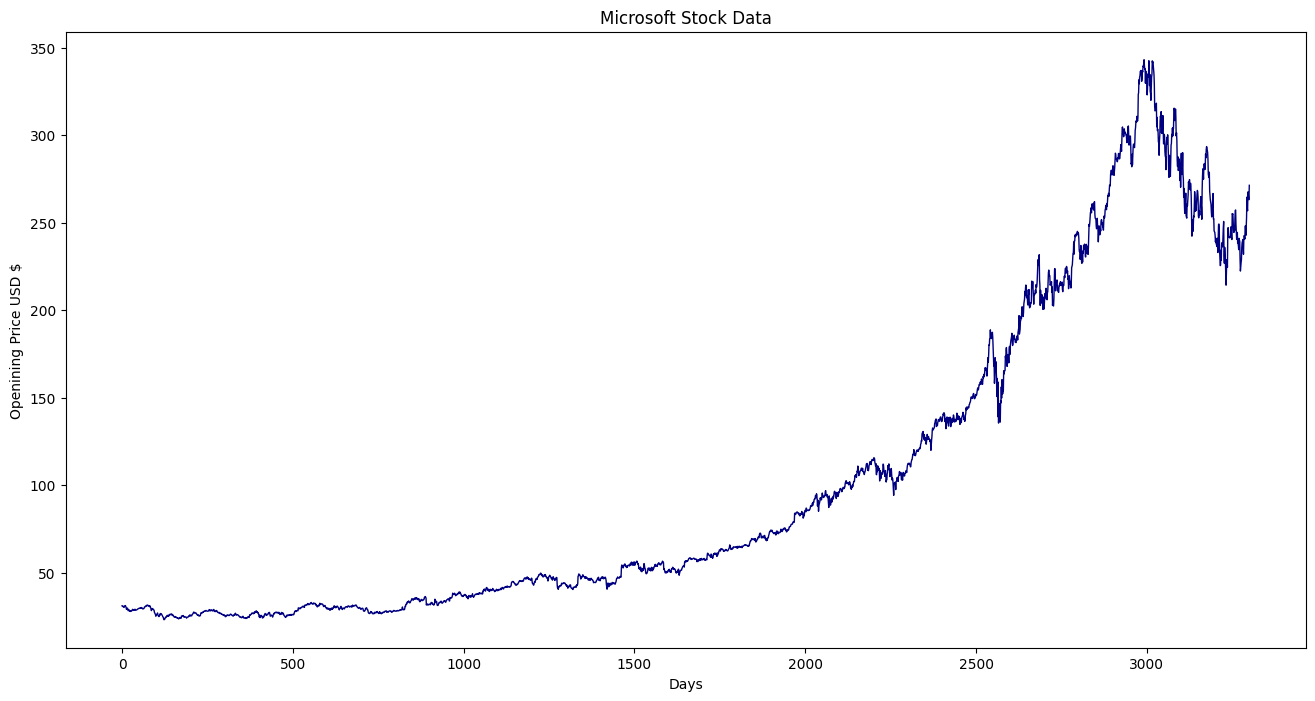

In [6]:
plt.figure (figsize= (16,8))
plt.title ("Microsoft Stock Data")
plt.xlabel ('Days')
plt.ylabel ('Openining Price USD $')
plt.plot (df['Close'], color='navy', lw=1)
plt.show()

### Remove 200 days of data for Testing

In [10]:
Train=df.drop(df.index[-200:])
Final_Test= df.tail(200).copy()

In [12]:
Train.drop(labels=["Date", "Prediction"],axis=1)

,Open,High,Low,Close,Adj Close,Volume
0,30.620001,31.100000,30.590000,30.950001,23.623899,38409100
1,30.850000,31.100000,30.639999,30.959999,23.631531,49749600
2,30.879999,31.080000,30.520000,30.770000,23.486507,58182400
3,30.629999,30.700001,30.190001,30.450001,23.242258,50559700
4,30.280001,30.879999,30.240000,30.660000,23.402540,51197400
...,...,...,...,...,...,...
3096,288.579987,293.299988,280.059998,280.809998,278.081909,29454600
3097,281.679993,283.200012,273.380005,274.029999,271.367767,29405800
3098,273.290009,281.109985,270.769989,280.720001,277.992828,35678900
3099,277.500000,278.359985,270.000000,270.220001,267.594788,46518400


### Define the Training Data as X_train and Y_train

In [39]:
X_train= Train.drop(labels=["Date", "Prediction"],axis=1)
y_train= Train ["Prediction"]
X_Test= Final_Test.drop(labels=["Date", "Prediction"],axis=1)

### Train the Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor   # Change ths line  XGBRegressor
from sklearn.model_selection import GridSearchCV

In [55]:
Hyper_paramters={'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]}  # You need change this line to include the hyper paramters of your mdoel
Tree_Gridsearch_paramters=GridSearchCV(DecisionTreeRegressor(random_state=42),Hyper_paramters, #XGBoost or any other sklearn model 
scoring='neg_root_mean_squared_error', cv=5, verbose=1)

In [56]:
Tree_Models=Tree_Gridsearch_paramters.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


### Check the best Model

In [57]:
print ("The best paramter combination is ")
print (Tree_Models.best_params_)
Final_model=Tree_Models.best_estimator_

print ("The best model error was")
print (Tree_Models.best_score_)

importances=Final_model.feature_importances_
importances
Names=list(X_train.columns.values)
for f in range(X_train.shape[1]):
    print((Names[f],  importances[[f]]))

The best paramter combination is 
{'max_depth': 14}
The best model error was
-28.566469008516528
('Open', array([0.00343367]))
('High', array([0.16415909]))
('Low', array([0.81457852]))
('Close', array([0.01567892]))
('Adj Close', array([0.00200279]))
('Volume', array([0.00014701]))


### Let us Apply our model on the FInal test Data

In [58]:
Tree_predictions=Final_model.predict(X_Test)
True_Values=Final_Test['Prediction'].values

In [59]:
from sklearn.metrics import r2_score
# Compute the R2 score
R2 = r2_score(True_Values, Tree_predictions)

# Compute the MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(True_Values, Tree_predictions)

# Print the results
print("R2 score: ", R2)
print("MAPE: ", MAPE)


R2 score:  0.8294621793390814
MAPE:  2.185127436314307


### Let us Visulaize the performance of our Model

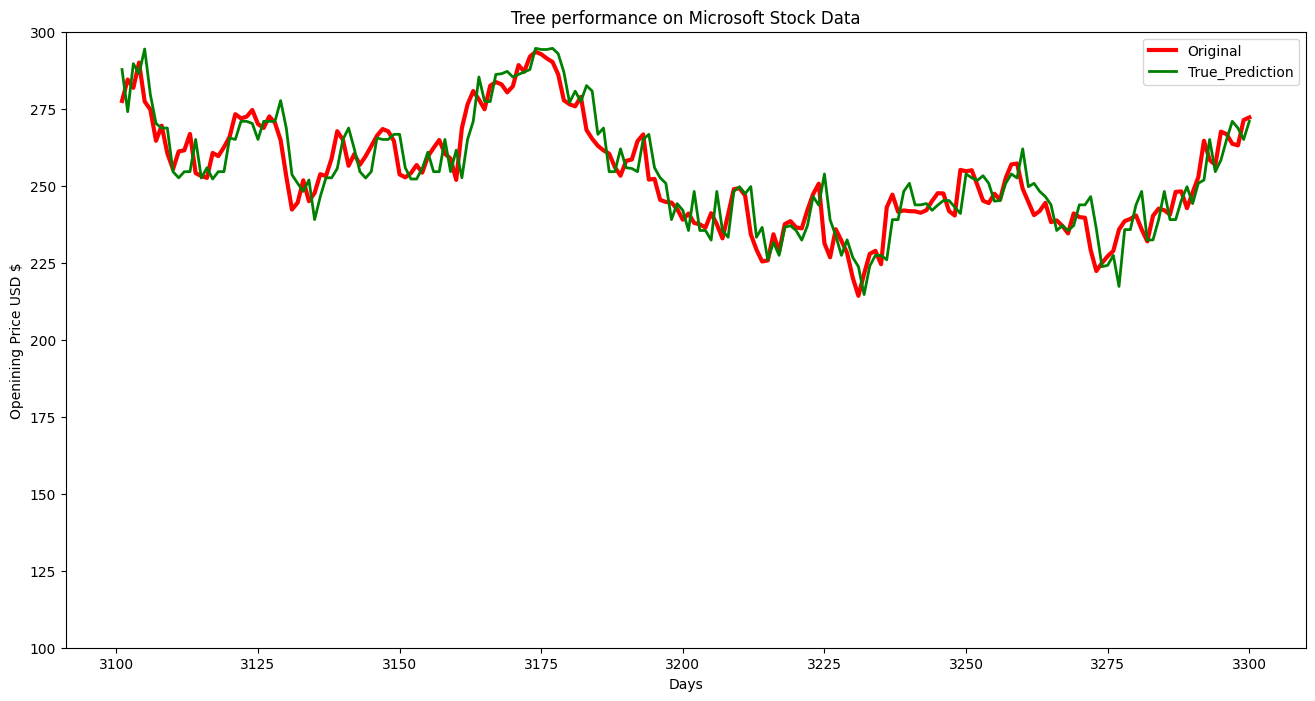

In [66]:
plt.figure (figsize= (16,8))
plt.title ("Tree performance on Microsoft Stock Data")
plt.xlabel ('Days')
plt.ylabel ('Openining Price USD $')
#Here we are drawing the actual data
plt.plot (Final_Test['Prediction'], color='red', lw=3)



#Here we are drawing the predictions of the model
Tree_model_predictions = pd.DataFrame(index=Final_Test.index, columns=[])
Tree_model_predictions['Prediction']=Tree_predictions
plt.plot(Tree_model_predictions['Prediction'],color='green',lw=2)
plt.legend(["Original","True_Prediction",'Tree_Model_predictions'])
plt.ylim(100,300)
plt.show()

In [ ]:
#Linear Regression
Ridge Regression
Lasso Regression
ElasticNet Regression
Polynomial Regression
Decision Tree Regression
Random Forest Regression
Gradient Boosting Regression
Extreme Gradient Boosting (XGBoost) Regression
Light Gradient Boosting Machine (LightGBM) Regression
CatBoost Regression
Support Vector Regression (SVR)
Gaussian Process Regression
K-Nearest Neighbors Regression
Multi-Layer Perceptron Regression
Bayesian Ridge Regression
Huber Regression
Theil-Sen Regression
Orthogonal Matching Pursuit (OMP) Regression
Least-Angle Regression (LARS)
LARS Lasso
Passive Aggressive Regression
RANSAC Regression
Multi-Output Regression